# 第三题 
随着行业的兴起 涌出了一些新的职业 试分析与预测相关职位的需求情况。试分析与预测相关职位的需求情况

需求情况：岗位对人才数量的需求、岗位对人才能力的需求

①分析

②预测

## 分析
岗位对人才数量的需求、岗位对人才能力的需求

In [11]:
#包都放这里
import datetime as dt
import matplotlib.pyplot as plt
from selenium import webdriver
import requests
from lxml import etree
import pandas as pd
import numpy as np
import time
import re
import jieba
from wordcloud import WordCloud
import PIL.Image as image
import numpy as np
from tqdm import tqdm

In [97]:
import pandas as pd
df=pd.read_csv('D:\gyt的D盘文件夹\建模课设\C题：附件\附件1：招聘信息.csv', encoding = 'gb18030')
df

,City,CompanyName,CompanyShortName,CompanySize,CreateTime,Education,FinanceStage,IndustryField,JobNature,PositionAdvantage,PositionFirstType,PositionName,PositionType,Salary,WorkYear,CompanyId,PositionId
0,北京,虫二公舍,北京虫二公舍网络科技有限公司,15-50人,2016-03-03 18:40:39,本科,初创型(天使轮),移动互联网,全职,高额的年终奖金＋团队项目股权,技术,Android,移动开发,10k-20k,3-5年,1,1
1,杭州,阿里巴巴,阿里巴巴（中国）网络技术有限公司,2000人以上,2016-03-03 18:40:32,本科,上市公司,移动互联网,全职,股票期权 五险一金 扁平空间 技术大牛,技术,前端工程师,前端开发,20k-40k,3-5年,2,2
2,广州,亿航智能无人机Ehang,广州亿航智能技术有限公司,150-500人,2016-03-03 18:40:30,大专,成长型(B轮),移动互联网 · 硬件,全职,双休、五险一金、美味午餐、零食任食....,职能,资深出纳,财务,6k-10k,5-10年,3,3
3,广州,亿航智能无人机Ehang,广州亿航智能技术有限公司,150-500人,2016/1/4 19:47,大专,成长型(B轮),移动互联网 · 硬件,全职,双休、五险一金、美味午餐、零食任食....,职能,资深出纳,财务,6k-10k,5-10年,3,3
4,广州,亿航智能无人机Ehang,广州亿航智能技术有限公司,150-500人,2016-03-03 18:40:18,大专,成长型(B轮),移动互联网 · 硬件,全职,双休、五险一金、美味午餐、零食任食....,技术,射频通信工程师,后端开发,8k-12k,不限,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530439,北京,火娃科技,上海火娃网络科技有限公司,50-150人,2016/3/3 11:18,学历不限,初创型(天使轮),O2O · 移动互联网,兼职,发展前景广阔,设计,兼职摄影师\探店达人,视觉设计,1k-2k,不限,26948,402623
530440,北京,中数创新,北京中数创新技术有限公司,50-150人,2016/3/3 11:18,大专,初创型(未融资),移动互联网 · 企业服务,全职,六险一金 带薪年假 节日福利 员工旅游,市场与销售,软件销售,销售,5k-8k,不限,698,402624
530441,深圳,无何有,深圳市无何有网络科技有限公司,15-50人,2016/3/3 11:18,大专,初创型(天使轮),移动互联网,全职,五险一金+年底双薪+体检 +旅游+双休,设计,2D插画师,视觉设计,5k-10k,1-3年,2520,402625
530442,北京,阿里云,北京阿里巴巴云计算技术有限公司,2000人以上,2016/3/3 11:18,本科,成熟型(D轮及以上),数据服务 · 文化娱乐,全职,来，一起站在云计算爆发的潮头！,市场与销售,市场推广,市场/营销,10k-20k,1-3年,2918,402626


In [21]:
df_data=df[pd.Series(['数据' in i for i in df['PositionName']])]

In [40]:
df_new=df_data[~pd.Series([i=='dba' for i in df.PositionType])]

C:\Users\86136\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


# 时间维度

In [44]:
date=pd.to_datetime(df_new["CreateTime"]).dt.date
df_new['date']=date

C:\Users\86136\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [207]:
gb=df_new.groupby('date')
data=gb.agg('count')['City']

C:\Users\86136\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


(array([16770., 16784., 16801., 16815., 16832., 16846., 16861., 16875.,
        16892.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

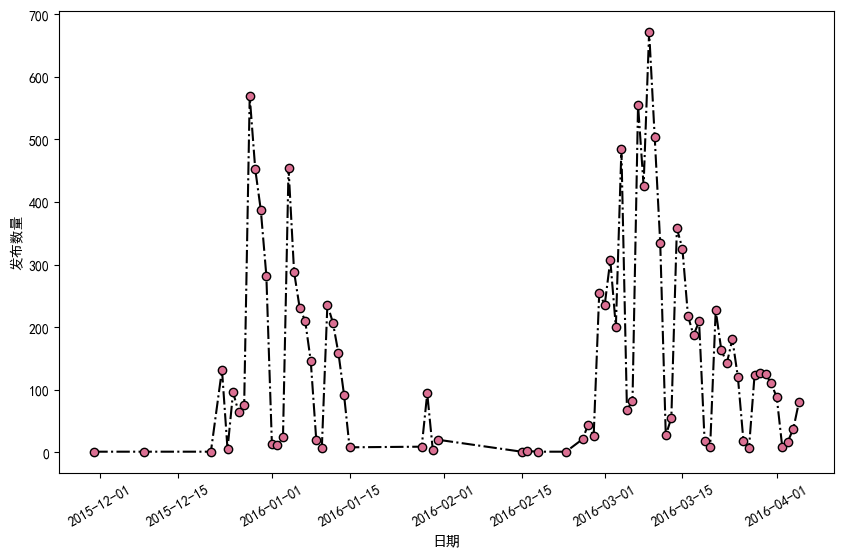

In [263]:
import matplotlib.pyplot as plt
# plt.style.use("seaborn-ticks")
plt.style.use('default')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(10,6))
plt.plot(data,Linestyle='-.',linewidth=1.5,color='k',label='发布数量',marker='o',markerfacecolor='palevioletred',markeredgecolor='k')#markerfacecolor='palevioletred'plt.xlabel('日期')
plt.ylabel('发布数量')
plt.xlabel('日期')
plt.xticks(rotation=30)

# 地域维度

In [279]:
citys=df_new['City'].value_counts()

In [298]:
city = [[i, j] for i,j in zip(name, vall)]
city

[['北京', 5813],
 ['上海', 1879],
 ['深圳', 1048],
 ['杭州', 830],
 ['广州', 677],
 ['成都', 192],
 ['南京', 173],
 ['武汉', 173],
 ['苏州', 94],
 ['厦门', 71],
 ['长沙', 58],
 ['西安', 52],
 ['重庆', 40],
 ['珠海', 40],
 ['天津', 39],
 ['合肥', 39],
 ['青岛', 30],
 ['郑州', 29],
 ['福州', 28],
 ['东莞', 23],
 ['无锡', 22],
 ['大连', 20],
 ['济南', 15],
 ['沈阳', 13],
 ['宁波', 10],
 ['中山', 9],
 ['南昌', 7],
 ['佛山', 7],
 ['石家庄', 7],
 ['贵阳', 6],
 ['朝阳', 5],
 ['柳州', 4],
 ['烟台', 4],
 ['潍坊', 4],
 ['常州', 4],
 ['昆明', 3],
 ['长春', 3],
 ['海口', 3],
 ['温州', 2],
 ['汕头', 2],
 ['嘉兴', 2],
 ['昆山', 2],
 ['哈尔滨', 2],
 ['金华', 1],
 ['扬州', 1],
 ['肇庆', 1],
 ['太原', 1],
 ['聊城', 1],
 ['泉州', 1],
 ['南通', 1],
 ['徐州', 1],
 ['西宁', 1],
 ['惠州', 1],
 ['三亚', 1]]

In [309]:
# list11=[['北京', 5819], ['上海', 1879], ['深圳', 1048], ['四川', 42], ['广东', 41], ['浙江', 35], ['湖北', 30], ['重庆', 26], ['江苏', 24], ['陕西', 16], ['河南', 12], ['中国', 12], ['湖南', 11], ['天津', 11], ['山东', 11], ['Sa', 10], ['Ne', 10], ['云南', 10], ['Lo', 10], ['福建', 9], ['辽宁', 9], ['Pa', 9], ['浙江', 9], ['江苏', 8], ['吉林', 8], ['安徽', 8], ['山东', 7], ['黑龙江', 7], ['Tō', 7], ['Me', 6], ['Re', 6], ['Sy', 6], ['辽宁', 6], ['福建', 5], ['江苏', 5], ["P'", 5], ['Lo', 5], ['Fi', 4], ['浙江', 4], ['To', 4], ['山西', 4], ['福建', 4], ['Be', 4], ['江西', 4], ['浙江', 4], ['Kā', 4], ['中国', 4], ['广西', 4], ['Am', 3], ['Sa', 3], ['He', 3], ['Ch', 3], ['Gr', 3], ['贵州', 3], ['Si', 3], ['Bo', 3], ['广东', 3], ['Ch', 3], ['广东', 3], ['湖南', 3], ['河南', 3], ['浙江', 2], ['Yu', 2], ['Os', 2], ['Al', 2], ['Fi', 2], ['福建', 2], ['We', 2], ['江苏', 2], ['Ma', 2], ['浙江', 2], ['An', 2], ['Ly', 2], ['Au', 2], ['Se', 2], ['广西', 2], ['云南', 2], ['广东', 2], ['江西', 2], ['江苏', 2], ['Zü', 2], ['Ph', 2], ['Pe', 2], ['宁夏', 2], ['Wa', 2], ['江苏', 2], ['内蒙古', 2], ['中国', 2], ['江苏', 2], ['新疆', 2], ['浙江', 2], ['云南', 1], ['Eu', 1], ['Is', 1], ['Ky', 1], ['福建', 1], ['Pr', 1], ['Bu', 1], ['广西', 1], ['Ci', 1], ['清迈', 1], ['浙江', 1], ['Si', 1], ['广东', 1], ['Ka', 1], ['Kø', 1], ['Mü', 1], ['湖南', 1], ['中国', 1], ['吉林', 1], ['河南', 1], ['Ba', 1], ['Ma', 1], ['广东', 1], ['Co', 1], ['广西', 1], ['Be', 1], ['江苏', 1], ['简阳', 1], ['黑龙江', 1], ['昆山', 1], ['Du', 1], ['Co', 1], ['四川', 1], ['安徽', 1], ['Bu', 1], ['Tr', 1], ['山东', 1], ['内蒙古', 1], ['江西', 1], ['Ka', 1], ['甘肃', 1], ['Sa', 1], ['Al', 1], ['四川', 1], ['山西', 1], ['Mu', 1], ['Je', 1], ['Ha', 1], ['Ge', 1], ['辽宁', 1], ['Ot', 1], ['四川', 1], ['Ex', 1], ['江苏', 1], ['Is', 1], ['Ed', 1], ['Va', 1], ['辽宁', 1], ['广东', 1], ['Mu', 1], ['Bu', 1], ['湖南', 1], ['内蒙古', 1], ['Sh', 1], ['江苏', 1], ['Mi', 1], ['新疆', 1], ['广东', 1], ['江西', 1], ['江苏', 1], ['安徽', 1], ['Ja', 1], ['安徽', 1], ['广东', 1], ['Mi', 1], ['河北', 1], ['An', 1], ['Be', 1], ['Lu', 1], ['Te', 1], ['Ca', 1], ['Gu', 1], ['Ci', 1], ['乐清', 1], ['Ar', 1], ['At', 1], ['广东', 1], ['Gh', 1], ['福建', 1], ['新疆', 1], ['山东', 1], ['Al', 1], ['河南', 1], ['宁国', 1], ['安徽', 1], ['Ku', 1], ['安徽', 1], ['湖北', 1], ['河南', 1], ['Sl', 1], ['安徽', 1], ['江西', 1], ['Tu', 1], ['甘肃', 1], ['河北', 1], ['吉林', 1], ['湖南', 1], ['新疆', 1], ['Aa', 1], ['Yo', 1], ['Do', 1], ['辽宁', 1], ['Wi', 1], ['Wa', 1], ['Fr', 1], ['广东', 1], ['La', 1], ['Al', 1], ['浙江', 1], ['Ka', 1], ['Ma', 1], ['西藏', 1], ['Li', 1], ['To', 1], ['湖北', 1], ['St', 1], ['Vā', 1], ['Ei', 1], ['湖南', 1], ['Ro', 1], ['河北', 1], ['Ba', 1], ['Se', 1], ['Jy', 1], ['No', 1], ['Na', 1], ['湖南', 1], ['Ha', 1], ['Ch', 1], ['Ra', 1], ['Tū', 1], ['山东', 1], ['Pe', 1], ['四川', 1], ['云南', 1], ['Gr', 1], ['Ba', 1], ['Ma', 1], ['江西', 1], ['Ox', 1], ['Cu', 1], ['青海', 1], ['江西', 1], ['河北', 1]]
list11=[['北京', 5813], ['上海', 1879], ['深圳', 1048], ['杭州', 830], ['广州', 677], ['成都', 192], ['南京', 173], ['武汉', 173], ['苏州', 94], ['厦门', 71], ['长沙', 58], ['西安', 52], ['重庆', 40], ['珠海', 40], ['天津', 39], ['合肥', 39], ['青岛', 30], ['郑州', 29], ['福州', 28], ['东莞', 23], ['无锡', 22], ['大连', 20], ['济南', 15], ['沈阳', 13], ['宁波', 10], ['中山', 9], ['南昌', 7], ['佛山', 7], ['石家庄', 7], ['贵阳', 6], ['朝阳', 5], ['柳州', 4], ['烟台', 4], ['潍坊', 4], ['常州', 4], ['昆明', 3], ['长春', 3], ['海口', 3], ['温州', 2], ['汕头', 2], ['嘉兴', 2], ['昆山', 2], ['哈尔滨', 2], ['金华', 1], ['扬州', 1], ['肇庆', 1], ['太原', 1], ['聊城', 1], ['泉州', 1], ['南通', 1], ['徐州', 1], ['西宁', 1], ['惠州', 1], ['三亚', 1]]
from pyecharts.charts import Map
from pyecharts import options
c = (
    Map(init_opts=options.InitOpts(width = '1700px', height='750px'))
    .add("发布数量",list11, "china-cities",map_value_calculation="sum",is_map_symbol_show=False)
    .set_series_opts(label_opts=options.LabelOpts(is_show=False)) #不显示标签（城市名）
    .set_global_opts(
    
        visualmap_opts=options.VisualMapOpts(max_=6000, is_piecewise=True),
    )
    .render("D:/gyt的D盘文件夹/暑假项目二/招聘地图.html")
)

In [321]:
# print(city)
city[:25]


[['北京', 5813],
 ['上海', 1879],
 ['深圳', 1048],
 ['杭州', 830],
 ['广州', 677],
 ['成都', 192],
 ['南京', 173],
 ['武汉', 173],
 ['苏州', 94],
 ['厦门', 71],
 ['长沙', 58],
 ['西安', 52],
 ['重庆', 40],
 ['珠海', 40],
 ['天津', 39],
 ['合肥', 39],
 ['青岛', 30],
 ['郑州', 29],
 ['福州', 28],
 ['东莞', 23],
 ['无锡', 22],
 ['大连', 20],
 ['济南', 15],
 ['沈阳', 13],
 ['宁波', 10]]

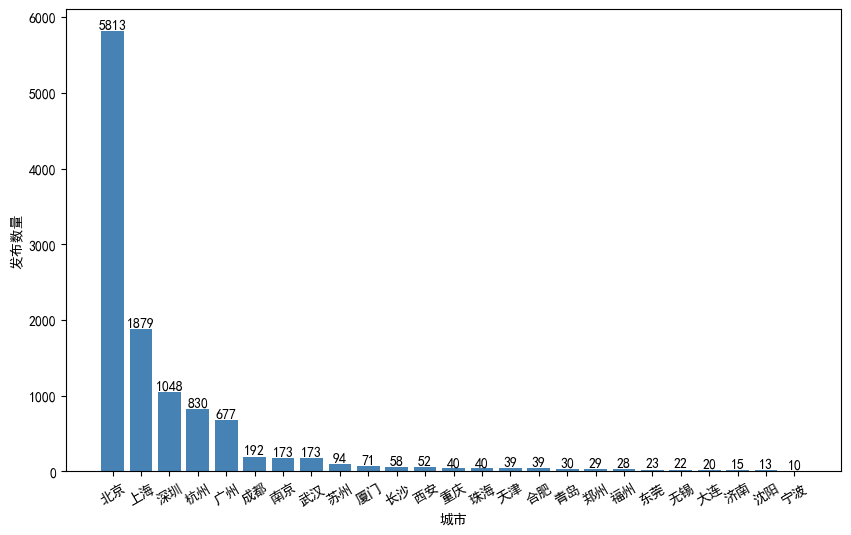

In [746]:
#条形统计图来一个
plt.figure(figsize=(10,6))
plt.bar(name[:25],vall[:25],color='steelblue')
# plt.plot(data,Linestyle='-.',linewidth=1.5,color='k',label='发布数量',marker='o',markerfacecolor='palevioletred',markeredgecolor='k')#markerfacecolor='palevioletred'plt.xlabel('日期')
plt.ylabel('发布数量')
plt.xlabel('城市')
plt.xticks(rotation=30)
for i in range(len(vall[:25])):
    plt.text(i,vall[:25][i],vall[:25][i],va='bottom',ha='center')

# 内容分析

## 学历

In [325]:
data2=df_new.Education.value_counts()

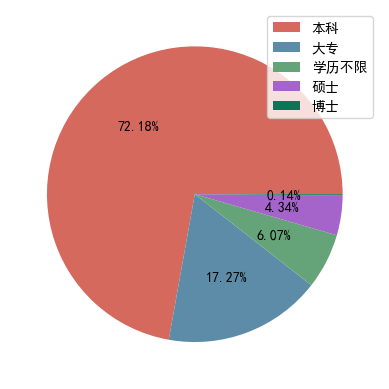

In [336]:
# y = np.array([35, 25, 25, 15])
label=['本科','大专','学历不限','硕士','博士']
plt.pie(data2, # 设置饼图标签
#         labels=['本科','大专','学历不限','硕士','博士'],
        colors=["#d5695d", "#5d8ca8", "#65a479", "#a564c9",'#0B7555'], # 设置饼图颜色
#         explode=(0, 0.2, 0, 0), # 第二部分突出显示，值越大，距离中心越远
        autopct='%.2f%%', # 格式化输出百分比
       )
plt.legend(labels=label,frameon =True)
# plt.title("RUNOOB Pie Test")
plt.show()

In [326]:
data2


本科      8297
大专      1985
学历不限     698
硕士       499
博士        16
Name: Education, dtype: int64

In [7]:
df2=pd.read_csv('D:\gyt的D盘文件夹\建模课设\C题：附件\附件3：职位描述.csv', encoding = 'gb18030')
df2

,Job_Description,PositionId
0,职位描述 1、基于Android平台进行手机软件的设计、开发、需求分析等； 任职要求： 1、...,1
1,岗位描述1、前端框架的设计与实现 2. 各业务模块前端代码开发 3. 平台易用性与用户体验...,2
2,岗位职责： 1、负责日常款项支付，境内外网银转帐汇款，处理日常往来账核对； 2、负责公司及分...,3
3,\n 岗位职责： \n 1、负责日常款项支付，境内外网银转帐汇款，处理日常往来账核对； \n...,3
4,岗位职责： 1、无线通信系统性能测试与分析，包括常见标准无线通信系统与私有协议标准系统; ...,4
...,...,...
539210,\n \n 职位描述 \n 探店达人要求： \n 1.热衷挖掘最新公众号内容以及第一手媒体资...,402623
539211,\n 软件销售 岗位职责: 1、负责公司产品的销售及推广； 2、根据市场营销计划，完成部...,402624
539212,\n 岗位职责： \n 1、儿童绘本插图绘制； \n 2、卡通形象设计。 \n \n 岗位...,402625
539213,\n1、根据云市场的品牌及业务需要，构建线下活动品牌，策划、组织云市场的各种线下活动；\n ...,402626


# 文本

In [55]:
df3=pd.merge(df_new,df2,on='PositionId',how="left")
df3

,City,CompanyName,CompanyShortName,CompanySize,CreateTime,Education,FinanceStage,IndustryField,JobNature,PositionAdvantage,PositionFirstType,PositionName,PositionType,Salary,WorkYear,CompanyId,PositionId,date,Job_Description
0,上海,七牛云存储,上海七牛信息技术有限公司,150-500人,2016-03-03 18:35:53,大专,成熟型(D轮及以上),移动互联网 · 数据服务,全职,弹性工作，年度旅游，定期体检,技术,资深大数据开发工程师,后端开发,18k-25k,5-10年,17,60,2016-03-03,工作职责： 参与系统架构设计，带领其他开发人员，最终完成系统的集成和完善。主动发现系统的弱点...
1,上海,七牛云存储,上海七牛信息技术有限公司,150-500人,2016-03-03 18:35:53,大专,成熟型(D轮及以上),移动互联网 · 数据服务,全职,弹性工作，年度旅游，定期体检,技术,资深大数据开发工程师,后端开发,18k-25k,5-10年,17,60,2016-03-03,\n 工作职责： \n 参与系统架构设计，带领其他开发人员，最终完成系统的集成和完善。主动发...
2,上海,七牛云存储,上海七牛信息技术有限公司,50-150人,2015/12/28 17:06,大专,成熟型(C轮),移动互联网 · 数据服务,全职,弹性工作，年度旅游，定期体检,技术,资深大数据开发工程师,后端开发,18k-25k,5-10年,17,60,2015-12-28,工作职责： 参与系统架构设计，带领其他开发人员，最终完成系统的集成和完善。主动发现系统的弱点...
3,上海,七牛云存储,上海七牛信息技术有限公司,50-150人,2015/12/28 17:06,大专,成熟型(C轮),移动互联网 · 数据服务,全职,弹性工作，年度旅游，定期体检,技术,资深大数据开发工程师,后端开发,18k-25k,5-10年,17,60,2015-12-28,\n 工作职责： \n 参与系统架构设计，带领其他开发人员，最终完成系统的集成和完善。主动发...
4,北京,阿里巴巴,阿里巴巴（中国）网络技术有限公司,2000人以上,2016-03-03 18:23:59,本科,上市公司,移动互联网,全职,股票期权 五险一金 扁平空间 技术大牛,技术,数据挖掘与分析高级工程师/架构师,后端开发,20k-40k,3-5年,2,228,2016-03-03,岗位描述： 1. 数据统计分析：高德地图业务用户行为数据统计与分析，产品效果评估与分析，为产...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17552,广州,奥园奥买家,广东奥园奥买家电子商务有限公司,50-150人,2016/3/3 10:26,本科,初创型(未融资),O2O · 电子商务,全职,以上市企业为依托,运营,数据分析师,运营,10k-20k,3-5年,32014,402031,2016-03-03,岗位职责： 1、在网站运营和营销传播两个方向上为客户提供数据分析服务，并根据数据分析结果提出...
17553,广州,奥园奥买家,广东奥园奥买家电子商务有限公司,50-150人,2016/3/3 10:26,本科,初创型(未融资),O2O · 电子商务,全职,以上市企业为依托,运营,数据分析师,运营,10k-20k,3-5年,32014,402031,2016-03-03,\n 岗位职责： \n 1、在网站运营和营销传播两个方向上为客户提供数据分析服务，并根据数据...
17554,北京,滴滴出行,滴滴出行,2000人以上,2016/3/3 10:35,本科,成熟型(D轮及以上),移动互联网,全职,商业保险、弹性工作、扁平管理、各种补贴,运营,快车事业部-车辆数据运营主管,运营,8k-10k,5-10年,2377,402157,2016-03-03,\n工作职责：\n 1、搭建平台整体车辆数据库并对接各类报表需求；\n 2、定期向公司提供车...
17555,广州,新元维讯,广州市新元维讯广告传播有限公司,150-500人,2016/3/3 10:35,大专,初创型(未融资),文化娱乐 · 移动互联网,全职,五金一险、年度体检、优美工作环境,市场与销售,发行数据文员,销售,2k-3k,1-3年,31883,402159,2016-03-03,\n 发行数据文员 \n 工作内容： \n 1 ）负责 杂志发运清单的统计及物流分配...


In [8]:
tmpdf=pd.read_csv('D:/gyt的D盘文件夹/暑假项目二/stoplist.txt',names=['w'],sep='aaa',encoding='utf-8')
df3['cut']=0


C:\Users\86136\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [12]:
for i in range(len(df3['Job_Description'].head(10))):
    words=jieba.cut(df3['Job_Description'][i])
    df3['cut'][i]=[w for w in words if w not in list(tmpdf.w)]
df3.cut

Building prefix dict from the default dictionary ...
Loading model from cache C:\WINDOWS\Temp\jieba.cache
Loading model cost 0.863 seconds.
Prefix dict has been built successfully.
C:\Users\86136\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\86136\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0        [工作, 职责,  , 参与, 系统, 架构设计, 带领, 开发人员, 最终, 系统, 集成...
1        [\n,  , 工作, 职责,  , \n,  , 参与, 系统, 架构设计, 带领, 开发...
2        [工作, 职责,  , 参与, 系统, 架构设计, 带领, 开发人员, 最终, 系统, 集成...
3        [\n,  , 工作, 职责,  , \n,  , 参与, 系统, 架构设计, 带领, 开发...
4        [岗位, 描述,  ,  , 数据, 统计分析, 高德, 地图, 业务, 用户, 数据, 统...
                               ...                        
17552                                                    0
17553                                                    0
17554                                                    0
17555                                                    0
17556                                                    0
Name: cut, Length: 17557, dtype: object

AttributeError: 'list' object has no attribute 'dis'

In [100]:
for i in tqdm(range(len(df3['Job_Description']))):
    words=jieba.cut(df3['Job_Description'][i])
    df3['cut'][i]=[w for w in words if w not in list(tmpdf.w)]

  0%|                                                                                        | 0/17557 [00:00<?, ?it/s]C:\Users\86136\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
100%|████████████████████████████████████████████████████████████████████████████| 17557/17557 [25:50<00:00, 11.32it/s]


In [18]:
df3.to_csv('D:\gyt的D盘文件夹\建模课设\分词结果1.csv',encoding="utf_8_sig")

In [16]:
#储存
import pandas as pd
# df3.to_csv('D:\gyt的D盘文件夹\建模课设\分词结果.csv',encoding="utf_8_sig")
df3=pd.read_csv('D:\gyt的D盘文件夹\建模课设\分词结果.csv')

In [3]:
mywordList=[]
for i in df3.cut:
    mywordList.append(i)
wordList=[x for item in mywordList for x in item]
wordList=[w for w in wordList if w not in [' ','\n']]#再去一下
comment=' '.join(wordList)

In [5]:
wordList

['[',
 "'",
 '工',
 '作',
 "'",
 ',',
 "'",
 '职',
 '责',
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 '参',
 '与',
 "'",
 ',',
 "'",
 '系',
 '统',
 "'",
 ',',
 "'",
 '架',
 '构',
 '设',
 '计',
 "'",
 ',',
 "'",
 '带',
 '领',
 "'",
 ',',
 "'",
 '开',
 '发',
 '人',
 '员',
 "'",
 ',',
 "'",
 '最',
 '终',
 "'",
 ',',
 "'",
 '系',
 '统',
 "'",
 ',',
 "'",
 '集',
 '成',
 "'",
 ',',
 "'",
 '完',
 '善',
 "'",
 ',',
 "'",
 '主',
 '动',
 "'",
 ',',
 "'",
 '发',
 '现',
 "'",
 ',',
 "'",
 '系',
 '统',
 "'",
 ',',
 "'",
 '弱',
 '点',
 "'",
 ',',
 "'",
 '改',
 '善',
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 '岗',
 '位',
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 '五',
 '年',
 "'",
 ',',
 "'",
 '服',
 '务',
 '端',
 "'",
 ',',
 "'",
 '工',
 '作',
 "'",
 ',',
 "'",
 '经',
 '验',
 "'",
 ',',
 "'",
 '至',
 '少',
 "'",
 ',',
 "'",
 '两',
 '年',
 "'",
 ',',
 "'",
 '海',
 '量',
 "'",
 ',',
 "'",
 '数',
 '据',
 '处',
 '理',
 "'",
 ',',
 "'",
 '并',
 '行',
 '计',
 '算',
 "'",
 ',',
 "'",
 '开',
 '发',
 "'",
 ',',
 "'",
 '经',
 '验',
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 '精',
 '通',
 "'",
 ','

In [6]:
#词频统计
counts=pd.DataFrame(data=wordList).value_counts()
pd.DataFrame(data=counts,columns=['频次']).head(50)
counts.head(50)

'    4357544
,    2161215
n     126491
数     120950
据     112057
\      97445
分      60514
a      53884
析      51452
业      46332
e      45954
o      40948
工      40142
计      40025
作      39639
经      37594
熟      37047
能      36633
验      35430
力      34998
优      34472
发      34099
责      33902
S      33064
学      31798
关      29064
理      28741
i      28103
统      27781
品      25999
t      25764
职      25417
悉      25297
r      25223
产      25172
相      25117
l      24625
务      24560
开      24538
p      24344
s      24114
算      20748
先      20105
系      19630
用      19508
负      19039
位      18998
掘      18515
设      18432
挖      18364
dtype: int64

In [201]:
# counts=counts.drop(['工作','相关','能力','优先','负责','用户','团队','公司','平台','年','项目','强','具备','行业','提供'])['以上学历','岗位职责','任职','中','职位','参与','至少','较强']
counts=counts.drop(['一种','建立','支持','岗位'])
counts.head(50)

C:\Users\86136\Anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


数据        55540
经验        32116
分析        27186
熟悉        25211
产品        20630
开发        19052
数据分析      18789
业务        16556
技术        12284
数据挖掘      11114
设计        10930
运营         9934
沟通         9550
需求         9387
算法         9311
学习         9242
系统         8805
数据库        8664
互联网        8442
优化         8437
熟练         7698
专业         7448
挖掘         7120
统计         6453
精通         5933
工具         5717
数学         5452
模型         5217
SQL        5175
Hadoop     5112
研究         4981
本科         4849
建模         4840
报告         4704
合作         4660
计算机        4576
管理         4455
海量         4436
机器         4155
语言         3942
数据仓库       3895
理解         3853
精神         3709
研发         3704
软件         3697
熟练掌握       3623
数据处理       3577
客户         3562
优秀         3482
维护         3465
dtype: int64

In [203]:
from pyecharts.charts import WordCloud
count=counts.head(200)
name=np.array(count.index)
val=(count.values)/len(count)
# wd = pd.read_csv(file_name, encoding = 'gbk')
# wd['销量'] = wd['销量']/len(wd)
word = [(i, j) for i,j in zip(name, val)]
wordCloud = WordCloud()
wordCloud.add("", word, word_size_range=[20, 100])
wordCloud.render("D:/gyt的D盘文件夹/建模课设/词云.html")

'D:\\gyt的D盘文件夹\\建模课设\\词云.html'

In [153]:
wordcloud = WordCloud()
wordcloud.add("", word, word_size_range=[20, 100])
wordcloud.render("D:/gyt的D盘文件夹/建模课设/词云1.html")

'D:\\gyt的D盘文件夹\\建模课设\\词云1.html'

In [345]:
print([i for i in count[:10].index.T])

[('数据',), ('经验',), ('分析',), ('熟悉',), ('产品',), ('开发',), ('数据分析',), ('业务',), ('技术',), ('数据挖掘',)]


In [285]:
# https://cdn.bootcdn.net/ajax/libs/echarts/5.1.2/echarts.esm.js
from pyecharts.globals import CurrentConfig, NotebookType, OnlineHostType
# CurrentConfig.ONLINE_HOST = "https://www.echartsjs.com/examples/vendors/echarts/"
CurrentConfig.ONLINE_HOST = "https://assets.pyecharts.org/assets/"

# 预测

In [408]:
dt1 = pd.date_range(start="20151130", end="20160405", freq="D") # freq="D"表示频率为每一天
dt2=pd.Series(dt1).dt.date
dt2=dt2
dt2=dt2.astype('object')
dt2=pd.DataFrame(dt2)
dt2
# data=pd.DataFrame(data).reset_index()
dt2.columns=['date']
dt2=dt2.astype('object')
df_ts=pd.merge(dt2,data,on="date",how='left')

In [443]:
# df_ts['City'].fillna(0, inplace=True)
# df_ts.drop('level_0',axis=1,inplace=True)
# df_ts.drop('index',axis=1,inplace=True)
# pd.merge(dt2,data,how="outter")
open_arr = scaler.fit_transform(df_ts.City.values.reshape(-1, 1)).reshape(-1)#
open_arr.shape

(128,)

In [694]:
from sklearn.preprocessing import MinMaxScaler
from tcn.tcn import TCN
from tensorflow import keras


window_size =  20# 窗口大小
batch_size = 30    # 训练批次大小
epochs = 200       # 训练epoch
filter_nums = 10   # filter数量
kernel_size = 3# kernel大小


def get_dataset(dd):
#     df = df_4[(df_4['loc']==dd)&(df_4['ra']==ra)].groupby('time').sum().reset_index(['time'])#pd.read_csv('./000001_Daily_2006_2018.csv')
    scaler = MinMaxScaler()
    open_arr = scaler.fit_transform(dd.City.values.reshape(-1, 1)).reshape(-1)
    X = np.zeros(shape=(len(open_arr) - window_size, window_size))
    label = np.zeros(shape=(len(open_arr) - window_size))
    print('这个是？'+str(len(open_arr)*0.8))
    for i in range(len(open_arr) - window_size):
        X[i, :] = open_arr[i:i+window_size]
        label[i] = open_arr[i+window_size]
    train_X = X[:int(len(open_arr)*0.8), :]
    print(train_X.shape)
    train_label = label[:int(len(open_arr)*0.8)]
    test_X = X[int(len(open_arr)*0.8):, :]
    test_label = label[int(len(open_arr)*0.8):]
    print(train_X.shape, train_label.shape, test_X.shape, test_label.shape, scaler)
    return train_X, train_label, test_X, test_label, scaler


def RMSE(pred, true):
    return np.sqrt(np.mean(np.square(pred - true)))

def plot(pred, true):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(len(pred)), pred)
    ax.plot(range(len(true)), true)
    plt.legend(['pred', 'true'])
    plt.show()
    
def build_model(dd):
    train_X, train_label, test_X, test_label, scaler = get_dataset(dd)
    train_X=train_X.reshape([train_X.shape[0],train_X.shape[1],1]) 
    test_X=test_X.reshape([test_X.shape[0],test_X.shape[1],1])  
    print(test_X)
    model = keras.models.Sequential([
        keras.layers.Input(shape=(window_size, 1)),
        TCN(nb_filters=filter_nums,                   # 滤波器的个数，类比于units
            kernel_size=kernel_size,                   # 卷积核的大小
            dropout_rate=0.2,
            dilations=[1, 2, 4,8,16,30,60,90]),     # 空洞因子
    
        keras.layers.Dense(units=1, activation='linear')
    ])
    model.summary()
    model.compile(optimizer='adam', loss='mae', metrics=['mae'])
    model.fit(train_X, train_label, validation_split=0.2, epochs=epochs)
    
    model.evaluate(test_X, test_label)
    prediction = model.predict(test_X)
    scaled_prediction = scaler.inverse_transform(prediction.reshape(-1, 1)).reshape(-1)
    scaled_test_label = scaler.inverse_transform(test_label.reshape(-1, 1)).reshape(-1)
    print('RMSE ', RMSE(scaled_prediction, scaled_test_label))
#     plot(scaled_prediction, scaled_test_label)
    pre=model.predict(train_X)#获得train预测值 60?
    pre_train=scaler.inverse_transform(pre.reshape(-1, 1)).reshape(-1)
    return model,scaled_prediction,scaled_test_label,pre_train,scaler


In [651]:
def predict(model, data, step, window,scaler):  
#     data = df[(df['loc']=="C")&(df['ra']==ra)].groupby('time').sum().reset_index(['time'])['实际金额']
    print(type(data.values))
    data=scaler.transform(data.City.values.reshape(-1, 1)).reshape(-1)
    ad_data = []
    cycle = data[-window:]#最后7个
    
    for i in range(step):    
        new_x = cycle.reshape(-1, window ,1)#有7个
        pred = model.predict(new_x)
        ad_data.append(float(pred[0]))
        cycle = np.append(cycle, pred)[-window:]
    ad_data=scaler.inverse_transform(np.array(ad_data).reshape(-1, 1)).reshape(-1)#反
    return ad_data

In [695]:
model,scaled_prediction,scaled_test_label,pre_train,scaler=build_model(df_ts)
pre=predict(model,df_ts,15,20,scaler)

这个是？102.4
(102, 20)
(102, 20) (102,) (6, 20) (6,) MinMaxScaler()
[[[0.49702381]
  [0.04017857]
  [0.08184524]
  [0.5327381 ]
  [0.48363095]
  [0.32440476]
  [0.27827381]
  [0.3110119 ]
  [0.02678571]
  [0.01339286]
  [0.33779762]
  [0.24404762]
  [0.21130952]
  [0.26934524]
  [0.17857143]
  [0.02678571]
  [0.01041667]
  [0.18303571]
  [0.1875    ]
  [0.1860119 ]]

 [[0.04017857]
  [0.08184524]
  [0.5327381 ]
  [0.48363095]
  [0.32440476]
  [0.27827381]
  [0.3110119 ]
  [0.02678571]
  [0.01339286]
  [0.33779762]
  [0.24404762]
  [0.21130952]
  [0.26934524]
  [0.17857143]
  [0.02678571]
  [0.01041667]
  [0.18303571]
  [0.1875    ]
  [0.1860119 ]
  [0.16369048]]

 [[0.08184524]
  [0.5327381 ]
  [0.48363095]
  [0.32440476]
  [0.27827381]
  [0.3110119 ]
  [0.02678571]
  [0.01339286]
  [0.33779762]
  [0.24404762]
  [0.21130952]
  [0.26934524]
  [0.17857143]
  [0.02678571]
  [0.01041667]
  [0.18303571]
  [0.1875    ]
  [0.1860119 ]
  [0.16369048]
  [0.13095238]]

 [[0.5327381 ]
  [0.48363095]

81/81 [==============================] - 0s 2ms/sample - loss: 0.1391 - mean_absolute_error: 0.1391 - val_loss: 0.1537 - val_mean_absolute_error: 0.1537
Epoch 85/200
81/81 [==============================] - 0s 2ms/sample - loss: 0.1269 - mean_absolute_error: 0.1269 - val_loss: 0.1530 - val_mean_absolute_error: 0.1530
Epoch 86/200
81/81 [==============================] - 0s 2ms/sample - loss: 0.1730 - mean_absolute_error: 0.1730 - val_loss: 0.1546 - val_mean_absolute_error: 0.1546
Epoch 87/200
81/81 [==============================] - 0s 2ms/sample - loss: 0.1128 - mean_absolute_error: 0.1128 - val_loss: 0.1576 - val_mean_absolute_error: 0.1576
Epoch 88/200
81/81 [==============================] - 0s 2ms/sample - loss: 0.1279 - mean_absolute_error: 0.1279 - val_loss: 0.1607 - val_mean_absolute_error: 0.1607
Epoch 89/200
81/81 [==============================] - 0s 2ms/sample - loss: 0.1301 - mean_absolute_error: 0.1301 - val_loss: 0.1619 - val_mean_absolute_error: 0.1619
Epoch 90/200
81/8

81/81 [==============================] - 0s 2ms/sample - loss: 0.1052 - mean_absolute_error: 0.1052 - val_loss: 0.1180 - val_mean_absolute_error: 0.1180
Epoch 183/200
81/81 [==============================] - 0s 2ms/sample - loss: 0.1002 - mean_absolute_error: 0.1002 - val_loss: 0.1182 - val_mean_absolute_error: 0.1182
Epoch 184/200
81/81 [==============================] - 0s 2ms/sample - loss: 0.0941 - mean_absolute_error: 0.0941 - val_loss: 0.1192 - val_mean_absolute_error: 0.1192
Epoch 185/200
81/81 [==============================] - 0s 2ms/sample - loss: 0.0965 - mean_absolute_error: 0.0965 - val_loss: 0.1210 - val_mean_absolute_error: 0.1210
Epoch 186/200
81/81 [==============================] - 0s 3ms/sample - loss: 0.0931 - mean_absolute_error: 0.0931 - val_loss: 0.1241 - val_mean_absolute_error: 0.1241
Epoch 187/200
81/81 [==============================] - 0s 3ms/sample - loss: 0.1072 - mean_absolute_error: 0.1072 - val_loss: 0.1265 - val_mean_absolute_error: 0.1265
Epoch 188/20

In [635]:
train_X, train_label, test_X, test_label, scaler = get_dataset(df_ts)
train_X.shape

这个是？102.4
(98, 30)
(98, 30) (98,) (0, 30) (0,) MinMaxScaler()


(98, 30)

In [636]:
pre_train.shape,scaled_prediction.shape

((102,), (16,))

Text(0.5, 0, 'Day')

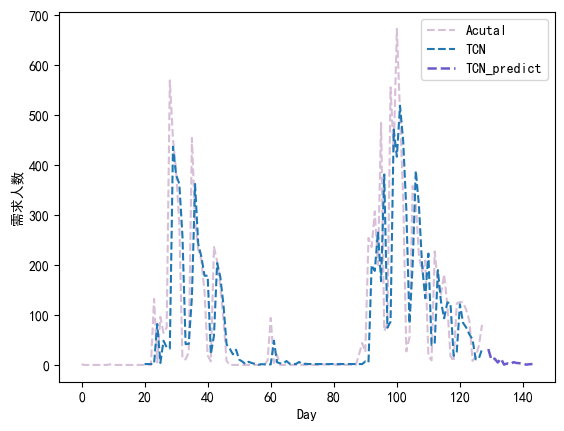

In [699]:
# s1=df_4[(df_4['loc']==dd)&(df_4['ra']==ra)].groupby('time').sum().reset_index(['time'])['实际金额']
s1=df_ts.City
s2=np.append(pre_train,scaled_prediction)#测试集+训练集
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(range(len(s1)),s1,c='thistle',linestyle='--')#真实
ax.plot(range(window_size,len(s2)+window_size),s2,linestyle='--')#训练集+验证集？
ax.plot(range(len(s1)+1,len(s1)+1+15),pre, linewidth=1.8, c ='slateblue',linestyle='--' )#'darkturquoise'
plt.legend(['Acutal','TCN', 'TCN_predict'])
plt.ylabel('需求人数')
plt.xlabel('Day')
# plt.ylabel(dd+'地'+ca+"类 日销售额")

In [697]:
pre

array([31.77552116, 10.22830841, 12.58863884,  4.89511777, 12.62373394,
        0.66395795,  2.9339734 ,  1.20848957,  5.54618731,  3.8479135 ,
        3.37593435,  2.78693743,  0.54227625,  1.40190547,  1.76174144])

# 公司时期

In [744]:
pd.DataFrame(df_new.drop_duplicates('CompanyId').FinanceStage.value_counts())

,FinanceStage
成长型(A轮),626
初创型(未融资),485
上市公司,482
初创型(天使轮),382
成长型(B轮),375
成长型(不需要融资),337
成熟型(不需要融资),209
成熟型(C轮),159
成熟型(D轮及以上),121
初创型(不需要融资),117


In [706]:
df_new.FinanceStage.value_counts()/df.FinanceStage.value_counts()

null()             NaN
null(B 轮)          NaN
上市公司          0.036103
初创型(不需要融资)    0.008628
初创型(天使轮)      0.012403
初创型(未融资)      0.013116
成熟型(C轮)       0.036516
成熟型(D轮及以上)    0.048793
成熟型(不需要融资)    0.026511
成长型(A轮)       0.019403
成长型(B轮)       0.027252
成长型(不需要融资)    0.013656
Name: FinanceStage, dtype: float64

In [745]:
pd.DataFrame(df.drop_duplicates('CompanyId').FinanceStage.value_counts())

,FinanceStage
初创型(未融资),9131
初创型(天使轮),5912
成长型(A轮),4564
成长型(不需要融资),3400
初创型(不需要融资),3050
上市公司,2388
成长型(B轮),1451
成熟型(不需要融资),1037
成熟型(D轮及以上),563
成熟型(C轮),553


In [713]:
data_stage=df_new.drop_duplicates('CompanyId').FinanceStage.value_counts()/df.drop_duplicates('CompanyId').FinanceStage.value_counts()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

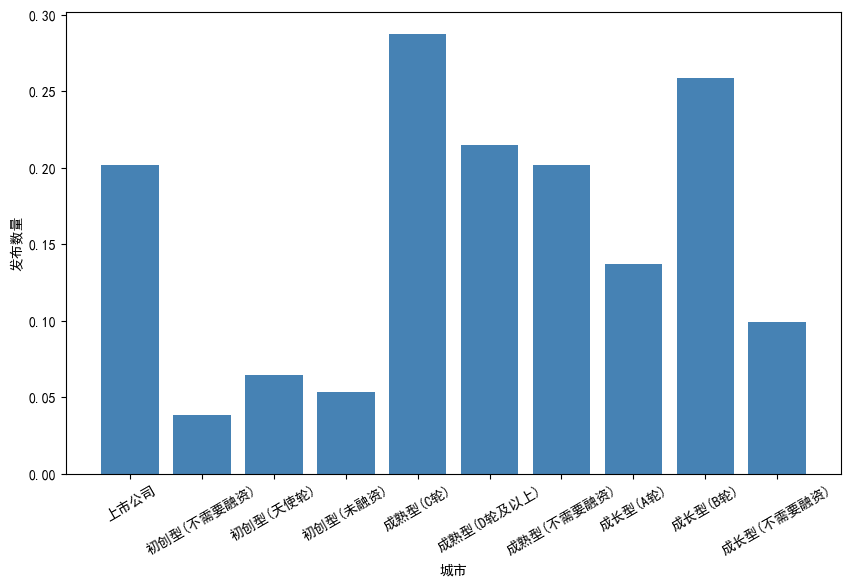

In [714]:
plt.figure(figsize=(10,6))
plt.bar(data_stage.index,data_stage.values,color='steelblue')
# plt.plot(data,Linestyle='-.',linewidth=1.5,color='k',label='发布数量',marker='o',markerfacecolor='palevioletred',markeredgecolor='k')#markerfacecolor='palevioletred'plt.xlabel('日期')
plt.ylabel('发布数量')
plt.xlabel('城市')
plt.xticks(rotation=30)

In [743]:
# .shape

labels.shape
pd.DataFrame(val1)

,0
0,626
1,485
2,482
3,382
4,375
5,337
6,209
7,159
8,121
9,117


<BarContainer object of 10 artists>

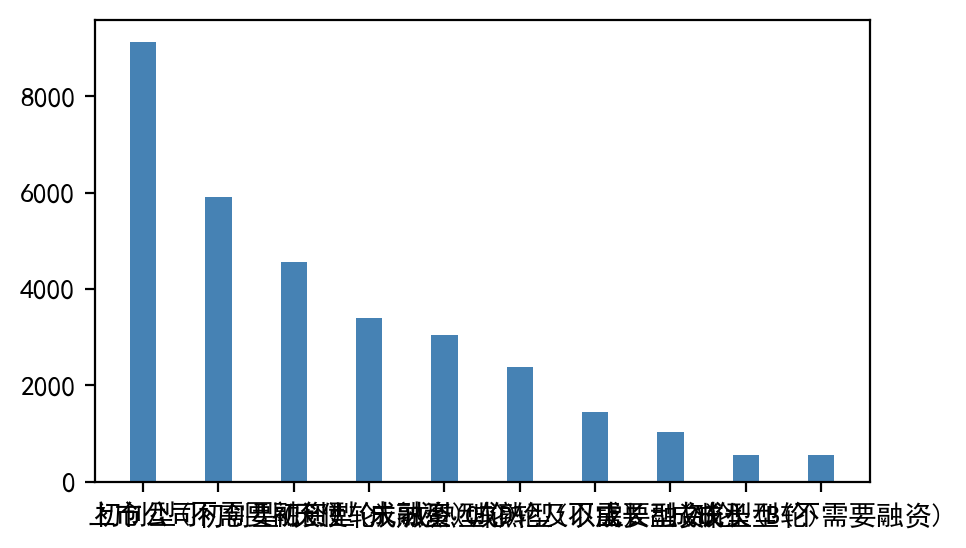

In [740]:
import matplotlib.pyplot as plt
 
# labels = data_stage.index
# labels=labels.drop(['null()','null(B 轮)'])
val1 = df_new.drop_duplicates('CompanyId').FinanceStage.value_counts().values
val2 = df.drop_duplicates('CompanyId').FinanceStage.value_counts().values[:10]
width = 0.35       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots(figsize=(5,3),dpi=200)
# bar(data_stage.index,data_stage.values,color='steelblue')
ax.bar(labels,val1, width,label='Men')
ax.bar(labels,val2, width,label='Women',color='steelblue')#, bottom=men_means
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.legend()
# ax.text(.87,-.08,'\nVisualization by DataCharm',transform = ax.transAxes,
#         ha='center', va='center',fontsize = 5,color='black',fontweight='bold',family='Roboto Mono')
# plt.savefig(r'F:\DataCharm\SCI paper plots\sci_bar_guanwang',width=5,height=3,
#             dpi=900,bbox_inches='tight')